In [1]:
import pandas as pd
import numpy as np
#import matplot.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
abridged_counties = pd.read_csv('abridged_couties.csv')

In [3]:
abridged_counties.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [4]:
confirmed_US = pd.read_csv('time_series_covid19_confirmed_US.csv')

In [5]:
deaths_US = pd.read_csv('time_series_covid19_deaths_US.csv')

## Exploratory Data Analysis & Data Cleaning (5+ Visualizations)

#### Structure of Data

1. There are 3255 records for both the confirmed cases and deaths tables and 3244 records in the abridged counties table. Each record corresponds to a specific county in the US.
2. All data is organized in CSV files.
3. The fields in the cases/deaths tables involve geographic location and cases/deaths per day from 1/22/20 to 4/18/20. For our purposes, we're choosing to work with the case/death counts from the most recent data update on 4/18/20.
4. The fields in the abridged counties table include a variety of information ranging from demographics to health risk factors and participation in social distancing.

In [6]:
abridged_counties.shape

(3244, 87)

In [7]:
confirmed_US.shape

(3255, 99)

In [8]:
deaths_US.shape

(3255, 100)

In [9]:
abridged_counties = abridged_counties[:-2]

In [10]:
confirmed_US['FIPS'].isna().sum()

4

In [11]:
deaths_US['FIPS'].isna().sum()

4

In [12]:
temp1 = confirmed_US.iloc[:, 0:11].copy()
temp1 = temp1[temp1['FIPS'].isna()]

In [13]:
temp2 = deaths_US.iloc[:, 0:11].copy()
temp2 = temp2[temp2['FIPS'].isna()]
temp2

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key
3147,84070002,US,USA,840,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,"Dukes and Nantucket,Massachusetts,US"
3148,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.099700,-94.578600,"Kansas City,Missouri,US"
3253,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.000000,0.000000,"Michigan Department of Corrections (MDOC), Mic..."
3254,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.000000,0.000000,"Federal Correctional Institution (FCI), Michig..."


In [14]:
temp1[temp1['FIPS'].isna()].equals(temp2[temp2['FIPS'].isna()])

True

In [15]:
num_cases = []
num_cases.append(confirmed_US[confirmed_US['Admin2'] == 'Dukes and Nantucket']['4/18/20'].values[0])
num_cases.append(confirmed_US[confirmed_US['Admin2'] == 'Kansas City']['4/18/20'].values[0])
num_cases.append(confirmed_US[confirmed_US['Admin2'] == 'Michigan Department of Corrections (MDOC)']['4/18/20'].values[0])
num_cases.append(confirmed_US[confirmed_US['Admin2'] == 'Federal Correctional Institution (FCI)']['4/18/20'].values[0])
num_cases

[23, 412, 550, 45]

In [16]:
confirmed_US['4/18/20'].mean()

224.94531490015362

In [17]:
confirmed_US['4/18/20'].std()

2638.7899492981533

In [18]:
confirmed_US = confirmed_US[confirmed_US['Admin2'] != 'Dukes and Nantucket']
confirmed_US = confirmed_US[confirmed_US['Admin2'] != 'Kansas City']
confirmed_US = confirmed_US[confirmed_US['Admin2'] != 'Michigan Department of Corrections (MDOC)']

In [19]:
washtenaw_confirmed = confirmed_US[confirmed_US['Admin2'] == 'Washtenaw']['4/18/20'].values[0]
fci_confirmed = confirmed_US[confirmed_US['Admin2'] == 'Federal Correctional Institution (FCI)']['4/18/20'].values[0]
confirmed_US.loc[confirmed_US['Admin2'] == 'Washtenaw', ['4/18/20']] = washtenaw_confirmed + fci_confirmed
confirmed_US = confirmed_US[confirmed_US["Admin2"] != 'Federal Correctional Institution (FCI)']

In [20]:
deaths_US = deaths_US[deaths_US['Admin2'] != 'Dukes and Nantucket']
deaths_US = deaths_US[deaths_US['Admin2'] != 'Kansas City']
deaths_US = deaths_US[deaths_US['Admin2'] != 'Michigan Department of Corrections (MDOC)']

In [21]:
washtenaw_deaths = deaths_US[deaths_US['Admin2'] == 'Washtenaw']['4/18/20'].values[0]
fci_deaths = deaths_US[deaths_US['Admin2'] == 'Federal Correctional Institution (FCI)']['4/18/20'].values[0]
deaths_US.loc[deaths_US['Admin2'] == 'Washtenaw', ['4/18/20']] = washtenaw_deaths + fci_deaths
deaths_US = deaths_US[deaths_US["Admin2"] != 'Federal Correctional Institution (FCI)']

In [22]:
abridged_counties = abridged_counties.rename(columns={"countyFIPS": "FIPS"})

- We've removed 2 records without any information in abridged counties.
- There are 4 matching missing FIPS for both cases/deaths. After some exploration, it appears that none of the counties have insignificant counts of cases (counts relative to US average).
- According to https://www.nrcs.usda.gov/wps/portal/nrcs/detail/ma/home/?cid=nrcs143_013697, it appears that Duke and Nantucket are separate counties. As a result, we've removed this record as there isn't a clear way to separate cases and deaths for each county.
- According to https://en.wikipedia.org/wiki/Kansas_City,_Missouri, Kansas City has an unspecified FIPS as it is part of several counties, so we've removed this record as well.
- Similarly, based on https://www.michigan.gov/corrections/0,4551,7-119-1409---,00.html, the MDOC is spread across multiple counties in Michigan, justifying its removal.
- Lastly, the FCI's website, https://www.bop.gov/locations/institutions/mil/, states that it is a part of Washtenaw county. There's an existing record corresponding to this county, so we've edited the 4/18/20 count to reflect their combined cases and deaths.

In [23]:
deaths_US['FIPS'] = pd.to_numeric(deaths_US['FIPS'])
confirmed_US['FIPS'] = pd.to_numeric(confirmed_US['FIPS'])
abridged_counties['FIPS'] = pd.to_numeric(abridged_counties['FIPS'])

In [24]:
confirmed_US['4/18/20'].isna().sum()

0

In [25]:
deaths_US['4/18/20'].isna().sum()

0

In [26]:
abridged_counties['FIPS'].isna().sum()

0

In [27]:
confirmed_US['FIPS'].value_counts().max() == 1

True

In [28]:
deaths_US['FIPS'].value_counts().max() == 1

True

In [29]:
abridged_counties['FIPS'].value_counts().max() == 1

False

In [30]:
abridged_counties['FIPS'].value_counts(ascending = False)

60020    3
66010    2
69120    2
9009     1
13123    1
        ..
28143    1
24045    1
28139    1
24041    1
46061    1
Name: FIPS, Length: 3238, dtype: int64

In [31]:
dup1 = abridged_counties[abridged_counties['FIPS'] == 60020].copy()
dup1 = dup1.drop(columns = ['CountyName'])
dup1.iloc[0].equals(dup1.iloc[1])
dup1.iloc[0].equals(dup1.iloc[2])
dup1.iloc[1].equals(dup1.iloc[2])
abridged_counties = abridged_counties.loc[abridged_counties['FIPS'] != 60020]

In [32]:
dup2 = abridged_counties[abridged_counties['FIPS'] == 66010].copy()
dup2 = dup2.drop(columns = ['CountyName', 'StateName'])
dup2.iloc[0].equals(dup2.iloc[1])
abridged_counties = abridged_counties.loc[abridged_counties['CountyName'] != 'Guam']
abridged_counties.loc[abridged_counties['FIPS'] == 66010, ['CountyName']] = 'Cocos Island and Guam'

In [33]:
dup3 = abridged_counties[abridged_counties['FIPS'] == 69120].copy()
dup3 = dup3.drop(columns = ['CountyName'])
dup3.iloc[0].equals(dup3.iloc[1])
abridged_counties = abridged_counties.loc[abridged_counties['FIPS'] != 69120]

- There are 3 sets of duplicate FIPS in abridged counties: 60020, 66010, 69120
    - 60020 / 69120: There are only identical values in the following fields: HPSAShortage, HPSAServedPop, and HPSAUnderservedPop, which are statistics providing information on areas with health care shortages (https://data.hrsa.gov/tools/shortage-area/hpsa-find). All other fields are blank. Given that prevalent health care shortages suggest lower socioeconomic status, it makes sense that less data would be able to be collected. As a result, we've removed these records unless we decide to incorporate these fields as features.
    - 66010: Identical values in every field that is non-NaN. The two counties (Cocos Island and Guam) have the same FPIS, yet are technically part of different states (https://en.wikipedia.org/wiki/Cocos_Island_(Guam)). As a result, we've removed one of the records while adding their names together in the remaining one.

- After we ensured unique and non-null FIPS across all three tables, we decided to use it as a primary key.

In [34]:
confirmed_US = confirmed_US[['FIPS', '4/18/20']]
deaths_US = deaths_US[['FIPS', '4/18/20']]

In [35]:
df3 = abridged_counties.merge(deaths_US, on='FIPS', how='left')
df3 = df3.merge(confirmed_US, on='FIPS', how='left')
df3 = df3.rename(columns={"4/18/20_x": "4/18/20_deaths", "4/18/20_y": "4/18/20_confirmed"})
df3 = df3[df3['4/18/20_confirmed'] != 0]
df3 = df3.dropna(subset=['4/18/20_deaths', '4/18/20_confirmed'])

In [36]:
df3

,FIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,4/18/20_deaths,4/18/20_confirmed
0,1001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN,2.0,25.0
1,1003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN,2.0,109.0
2,1005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0,0.0,18.0
3,1007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0,0.0,26.0
4,1009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,56043,56.0,43.0,Washakie,WY,Wyoming,43.909060,-107.679282,44.012142,-107.911552,...,737503.0,737503.0,737500.0,737495.0,0.3732,NaN,NaN,NaN,0.0,5.0
3226,8014,8.0,14.0,Broomfield,CO,Colorado,39.963039,-105.058542,39.936888,-105.055491,...,737504.0,737501.0,737500.0,737495.0,0.0490,NaN,NaN,NaN,2.0,98.0
3227,12086,12.0,86.0,Miami-Dade,FL,Florida,25.607895,-80.587502,25.774565,-80.298888,...,737504.0,737504.0,737500.0,737495.0,0.8175,NaN,NaN,NaN,198.0,9045.0
3229,2195,2.0,195.0,Petersburg Borough,AK,NaN,NaN,NaN,56.812712,-133.115025,...,737501.0,737501.0,737500.0,737495.0,0.6650,NaN,NaN,NaN,0.0,2.0


In [37]:
df3['death_rate'] = df3['4/18/20_deaths'] / df3['4/18/20_confirmed']

In [38]:
df3.columns

Index(['FIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'PopFmle

In [39]:
unused_columns = ['PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010',
       'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010',
       'PopMale35-442010', 'PopFmle35-442010', 'PopMale45-542010',
       'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010',
       'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010',
       'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010',
       'PopMale>842010', 'PopFmle>842010', '3-YrMortalityAge<1Year2015-17',
       '3-YrMortalityAge1-4Years2015-17', '3-YrMortalityAge5-14Years2015-17',
       '3-YrMortalityAge15-24Years2015-17',
       '3-YrMortalityAge25-34Years2015-17',
       '3-YrMortalityAge35-44Years2015-17',
       '3-YrMortalityAge45-54Years2015-17',
       '3-YrMortalityAge55-64Years2015-17',
       '3-YrMortalityAge65-74Years2015-17',
       '3-YrMortalityAge75-84Years2015-17', '3-YrMortalityAge85+Years2015-17',
       'mortality2015-17Estimated']

df3.drop(unused_columns, axis=1, inplace = True)

In [40]:
df3.columns

Index(['FIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'stay at home',
       '>50 gatherings', '>500 gatherings', 'public schools',
       'restaurant dine-in', 'entertainment/gym', 'federal guidelines',
       'foreign travel ban', 'SVIPercentile', 'HP

### Exploring Features & Feature Engineering (demographics, health outcomes & risk factors)

In [41]:
df3['65+Percent'] = df3['PopulationEstimate65+2017']/df3['PopulationEstimate2018']

Incorporated 65+ as a percentage rather than raw numbers for comparison purposes, assuming the population in 2018 is not significantly different from 2017's.

In [42]:
df3['StrokeMortalityPercent'] = df3['StrokeMortality']

The StrokeMortality field refers to the estimated mortality rate per 100,000 across all ages/races/ethnicities/genders in 2014-2016 from all strokes.

In [43]:
df3['MedicarePercent'] = df3['MedicareEnrollment,AgedTot2017']/df3['#EligibleforMedicare2018']

Added field to represent percentage of those enrolled for Medicare.

In [44]:
df3['HDMortalityPercent'] = df3['HeartDiseaseMortality']

In [45]:
demographic_columns = ['FracMale2017', 'SVIPercentile', 'MedicarePercent', 'PopulationDensityperSqMile2010', 'MedianAge2010','65+Percent','dem_to_rep_ratio']
health_risk_columns = ['3-YrDiabetes2015-17','DiabetesPercentage', 'HDMortalityPercent', 'StrokeMortalityPercent','Smokers_Percentage', 'RespMortalityRate2014']
distancing_factors_columns = ['stay at home', '>50 gatherings','>500 gatherings', 'public schools', 'restaurant dine-in','entertainment/gym', 'federal guidelines', 'foreign travel ban']

All of the demographic and health risk columns are quantitative. The distancing factors, on the other hand, are all categorical and numeric. However, due to the fact that they're all based on the Gregorian ordinal of the date, there's a clear ordinal relationship between them, such that there is no need for One-Hot-Encoding. Other issues that may arise with incorporating OHE include an extremely high dimensional feature matrix and sparseness of features.

##### Demographics vs. Deaths, Confirmed Cases, and Death Rate

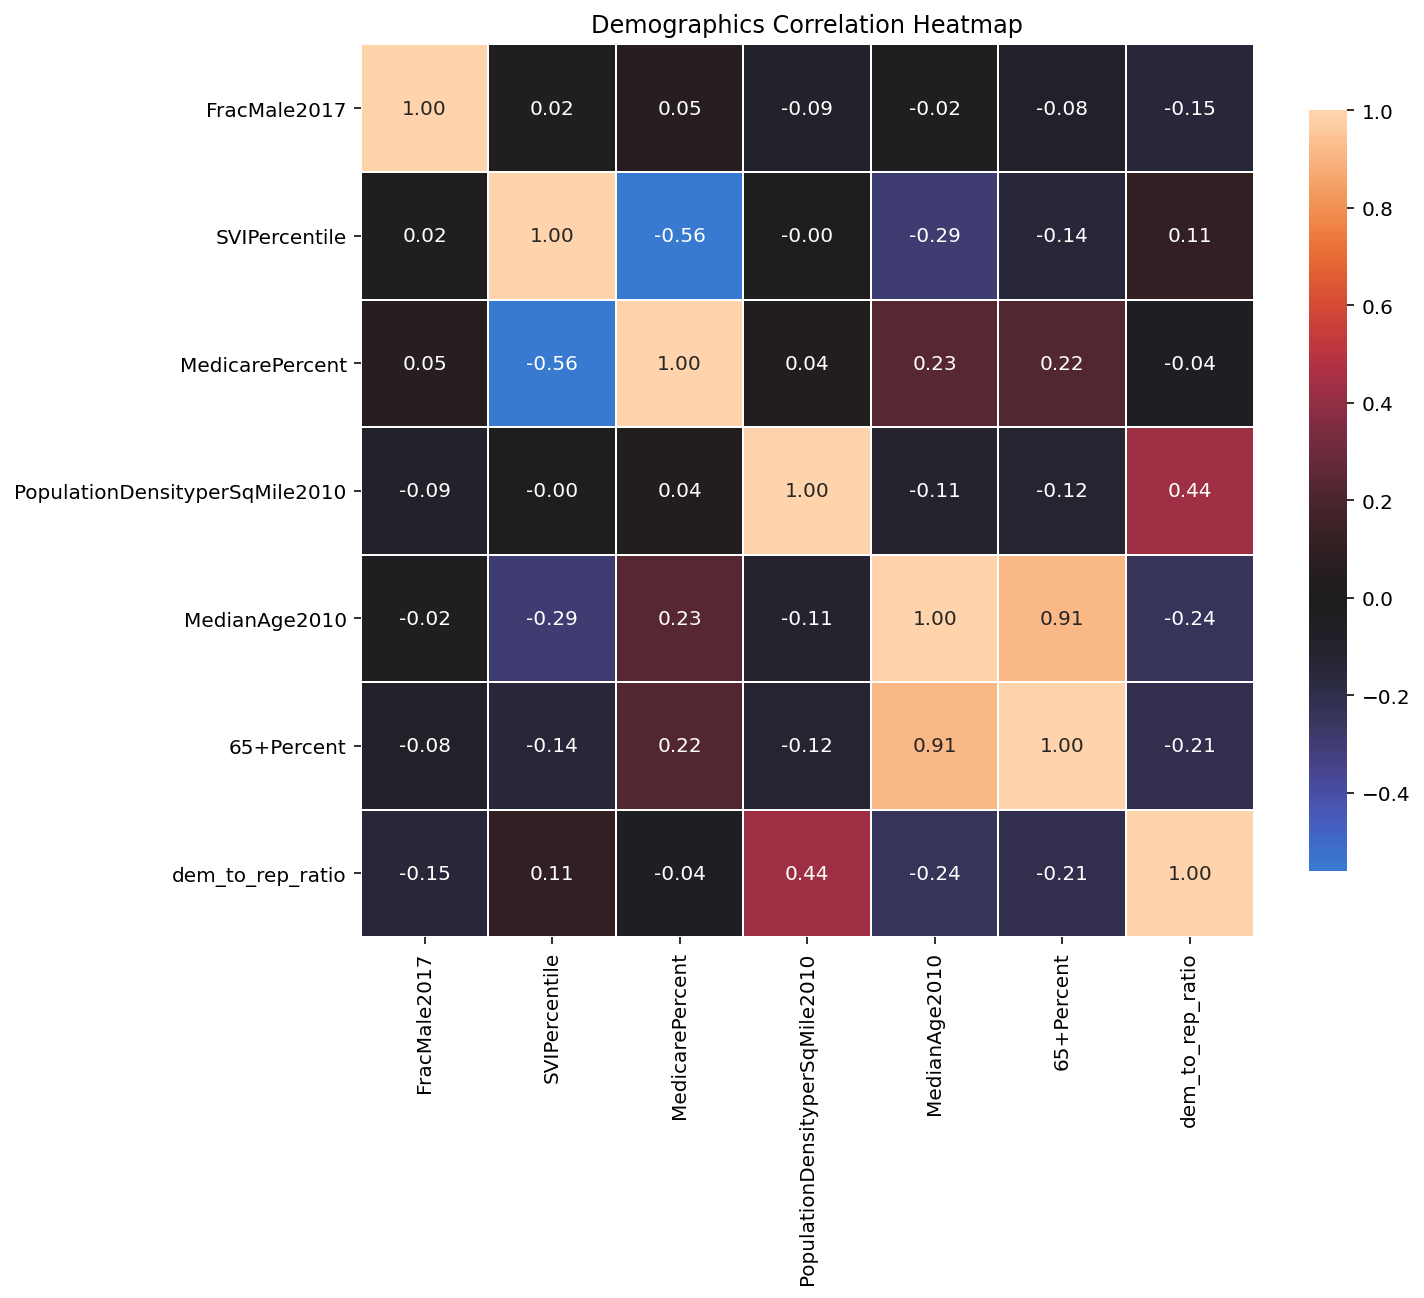

In [46]:
# Correlation plot between demographic features

def correlation_heatmap(train, title):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.title(title + ' Correlation Heatmap')
    plt.show();

demographics = df3[demographic_columns]
correlation_heatmap(demographics, 'Demographics')

We can see a number of interesting correlations in the demographic data. Most notably, SVIPercentile and Medicare enrollment have a strong negative correlation. Medicare enrollment also has correlations with age distribution, which makes sense intuitively. Political alignment is correlated with age distribution and population density, which also corroborates common knowledge.

From a COVID-19 epidemiology standpoint, the correlation between Medicare enrollment and Social Vulnerability Index may offer insight on how the most vulnerable communities may have more limited access to healthcare and present greater risk for infection and death.

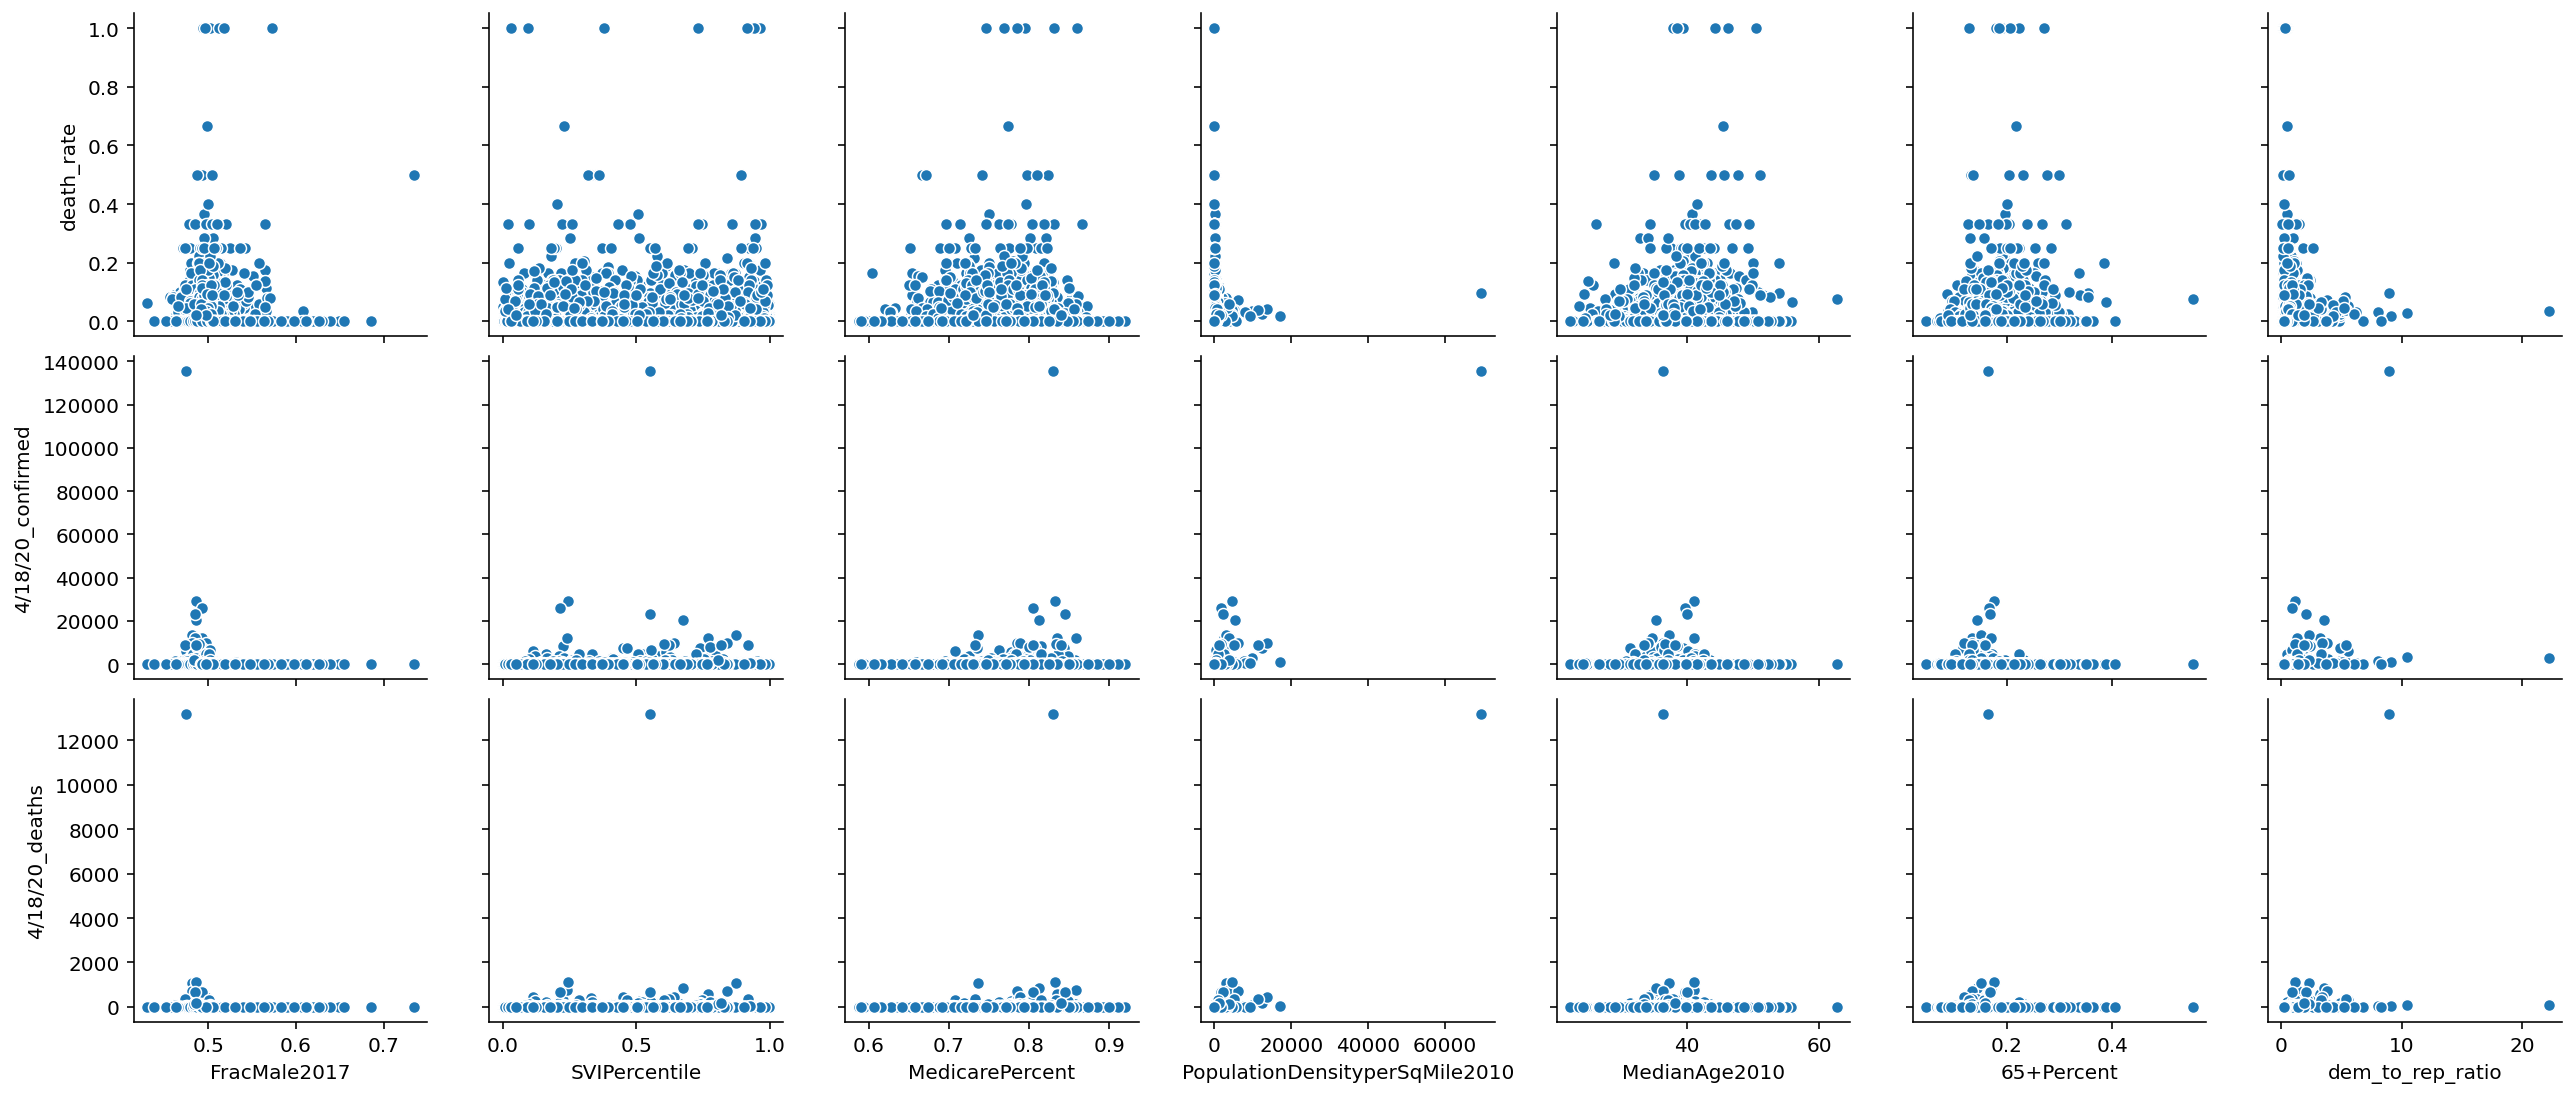

In [47]:
pp = sns.pairplot(data=df3,
                  y_vars=['death_rate', '4/18/20_confirmed', '4/18/20_deaths'],
                  x_vars=demographic_columns)

In [48]:
df3[df3['PopulationDensityperSqMile2010'] < 0]
df3[df3['dem_to_rep_ratio'] < 0]
df3[df3['PopulationDensityperSqMile2010'] == 0]
df3[df3['dem_to_rep_ratio'] == 0]
df3 = df3[df3['PopulationDensityperSqMile2010'] != 0]


- There seem to be many outliers for which death rate is 1.
- Comments on variance:
    - There appears to be relatively similar variance of SVIPercentiles, which supports the assumption of homoscedasticity in linear regression.
    - Larger variance for a medium range of MedicarePercent, MedianAge2010, and 65+ Percent
    - High variance for a small range of FracMales
- There are no negative values for both PopulationDensityperSqMile2010 and dem_to_rep_ratio. There is only one zero value for population density, for which the death and confirmed counts are 0 and 1, respectively. Given that the counts are extremely low, the death rate is relatively insignificant, such that we removed the record. There are no zero values for population density.
- Since there are no zero or negative values and a right skewness for both fields, it seems reasonable to apply a log transformation. After doing so, there appears to be more of an equal spread.

In [49]:
df3.loc[:, 'LogPopulationDensityperSqMile2010'] = np.log(df3.loc[:, 'PopulationDensityperSqMile2010'])
df3.loc[:, 'Logdem_to_rep_ratio'] = np.log(df3.loc[:, 'dem_to_rep_ratio'])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [50]:
df3[df3['death_rate'] == 1]

,FIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,HPSAUnderservedPop,4/18/20_deaths,4/18/20_confirmed,death_rate,65+Percent,StrokeMortalityPercent,MedicarePercent,HDMortalityPercent,LogPopulationDensityperSqMile2010,Logdem_to_rep_ratio
235,6103,6.0,103.0,Tehama,CA,California,40.136481,-122.245791,40.115187,-122.218704,...,NaN,1.0,1.0,1.0,0.191173,39.5,0.745898,173.2,3.068053,-0.822208
788,19007,19.0,7.0,Appanoose,IA,Iowa,40.754789,-92.866437,40.739836,-92.867034,...,NaN,2.0,2.0,1.0,0.223285,46.2,0.788495,204.4,3.254243,-0.798976
901,20035,20.0,35.0,Cowley,KS,Kansas,37.225204,-96.850530,37.174285,-96.997786,...,6329.0,1.0,1.0,1.0,0.178886,41.6,0.794458,190.2,3.475067,-0.845405
2001,38029,38.0,29.0,Emmons,ND,North Dakota,46.282325,-100.225861,46.265684,-100.210914,...,2846.0,1.0,1.0,1.0,0.270410,33.5,0.860534,188.2,0.875469,-2.054124
2011,38049,38.0,49.0,McHenry,ND,North Dakota,48.235643,-100.633383,48.182793,-100.694529,...,5449.0,1.0,1.0,1.0,0.205124,29.9,0.831633,132.0,1.064711,-1.431190
2573,48107,48.0,107.0,Crosby,TX,Texas,33.610739,-101.285480,33.664489,-101.361212,...,4126.0,1.0,1.0,1.0,0.184807,54.4,0.784615,190.7,1.902108,-0.925649
2633,48227,48.0,227.0,Howard,TX,Texas,32.299627,-101.442381,32.242066,-101.464986,...,12554.0,1.0,1.0,1.0,0.127294,43.4,0.769011,323.1,3.660994,-1.321681


In [51]:
df3 = df3[df3['death_rate'] != 1]
# df4 = df4[df4['4/18/20_confirmed'] > 25]

Removing further outliers:
There are 7 counties with death rates = 1, and all have very low figures for deaths and confirmed (=1.0 or 2.0). Given that the figures are very low, the fact that their death rate is 100% is not as significant, and we exclude these rows to make our dataset more robust.

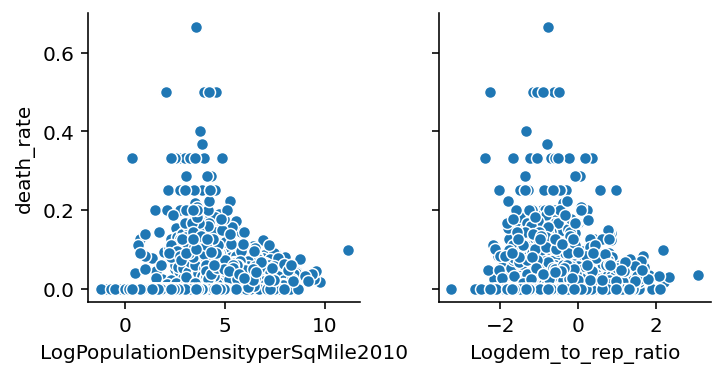

In [52]:
demographic_columns[3] = 'LogPopulationDensityperSqMile2010'
demographic_columns[6] = 'Logdem_to_rep_ratio'
pp = sns.pairplot(data=df3,
                 y_vars = ['death_rate'],
                 x_vars = ['LogPopulationDensityperSqMile2010', 'Logdem_to_rep_ratio'])

##### Health Risk Factors vs. Deaths, Confirmed Cases, and Death Rate

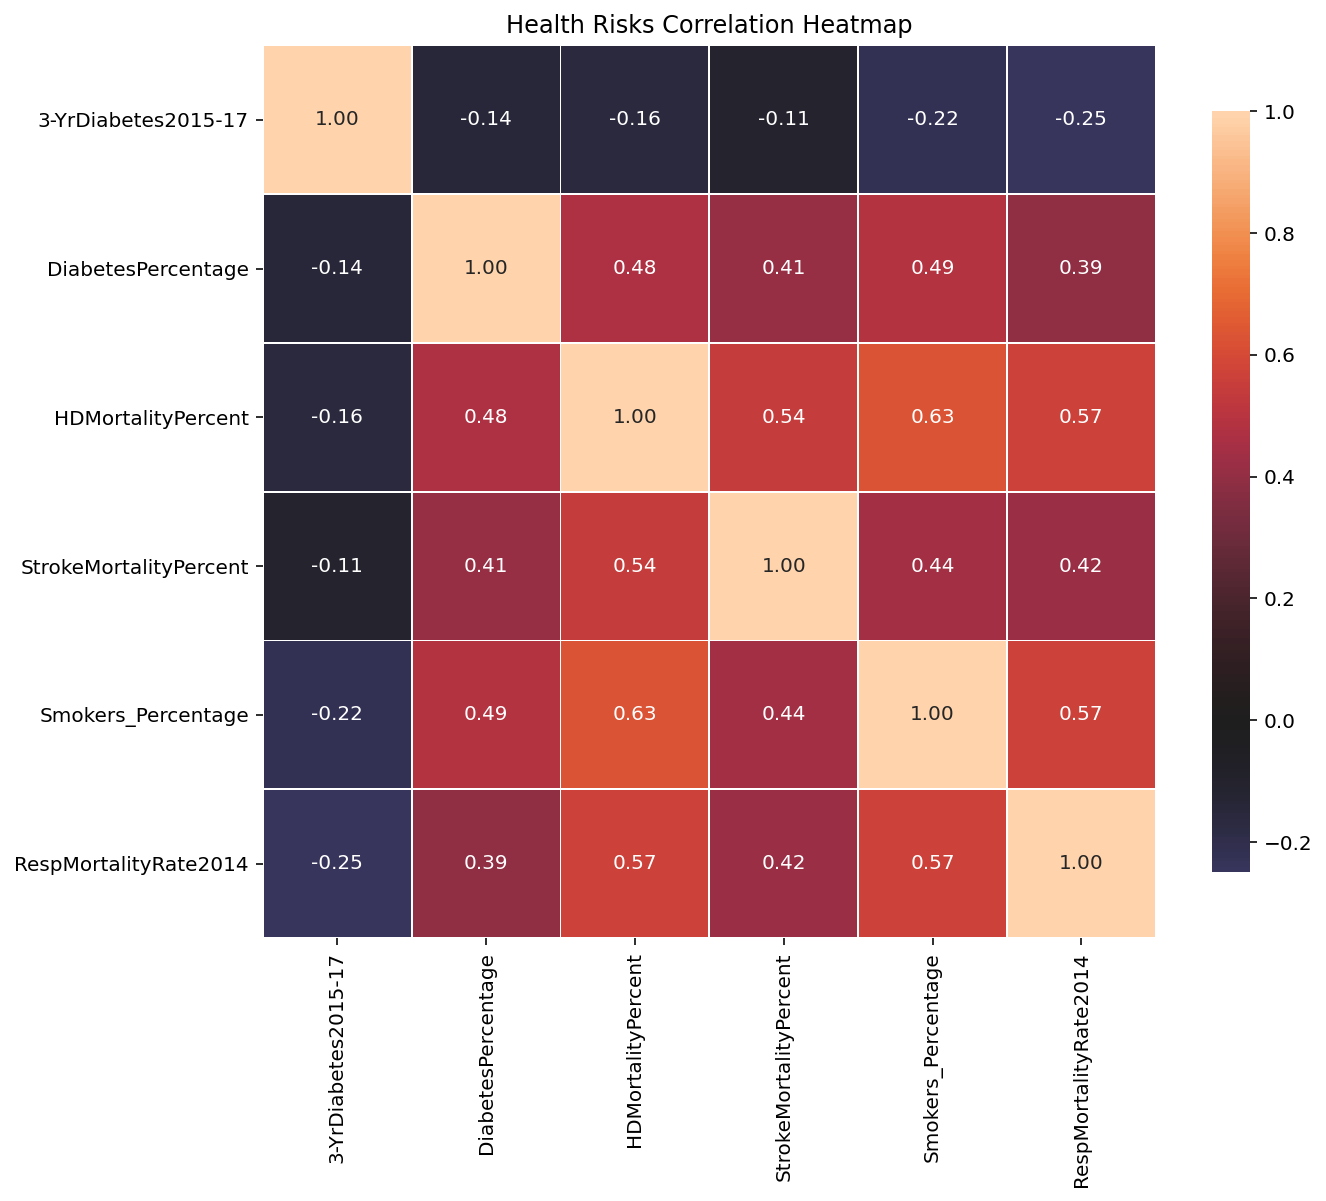

In [53]:
health_risks = df3[health_risk_columns]

correlation_heatmap(health_risks, 'Health Risks')

We can observe relatively significant correlations between most features in this group. HDMortality presents the strongest correlations with the other features like diabetes percentage, smokers percentage, stroke mortality rate, and respiratory mortality rate. The correlations found in this data might suggest that correlations with other disease and health risks like COVID-19 might also be significant. 

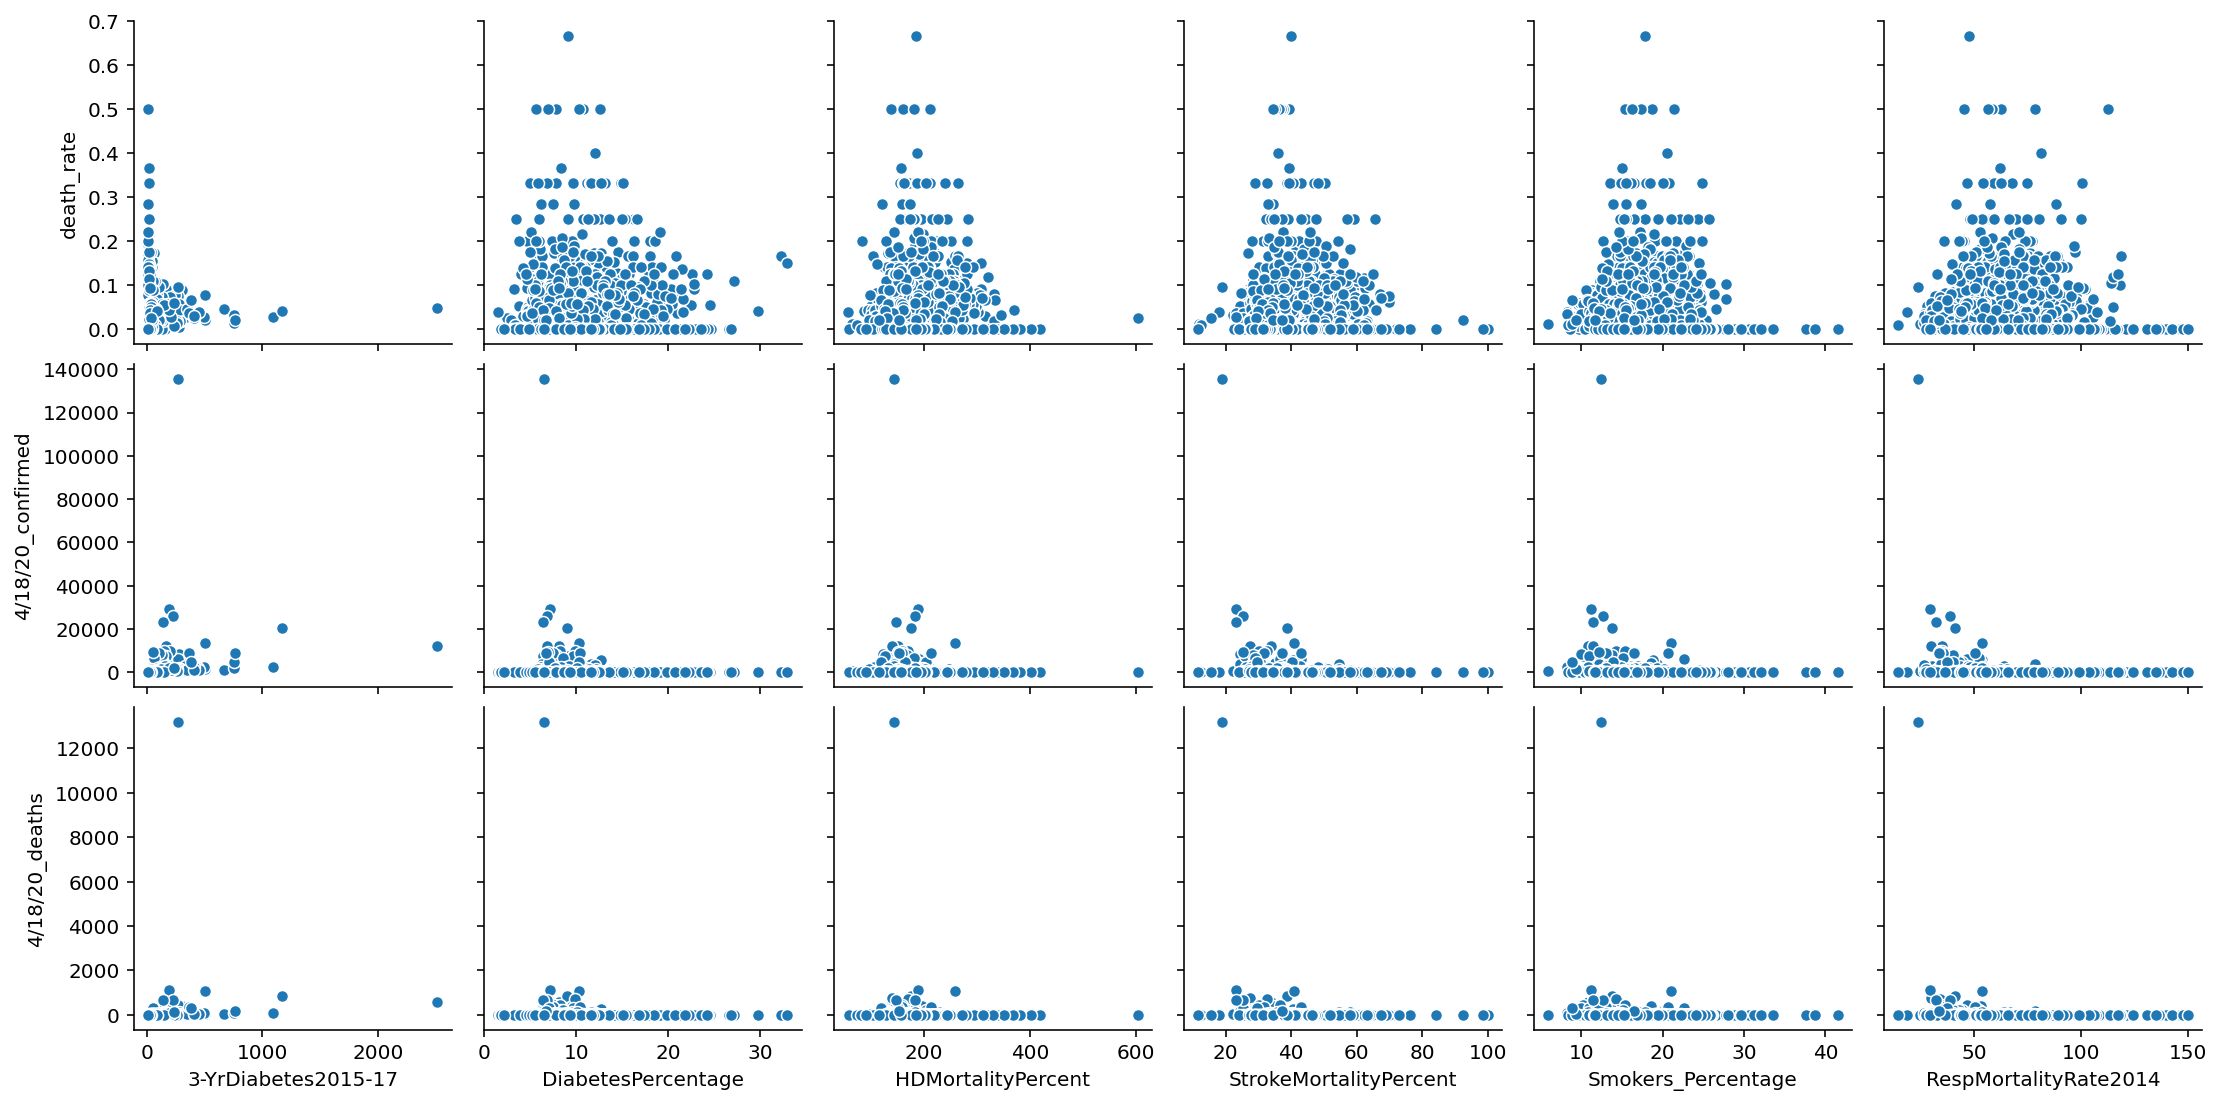

In [54]:
pp = sns.pairplot(data=df3,
                  y_vars=['death_rate', '4/18/20_confirmed', '4/18/20_deaths'],
                  x_vars=health_risk_columns)

In [55]:
df3[df3['3-YrDiabetes2015-17'] < 0]
df3[df3['3-YrDiabetes2015-17'] == 0]

,FIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,HPSAUnderservedPop,4/18/20_deaths,4/18/20_confirmed,death_rate,65+Percent,StrokeMortalityPercent,MedicarePercent,HDMortalityPercent,LogPopulationDensityperSqMile2010,Logdem_to_rep_ratio


- There are no negative or zero values for 3-YrDiabetes2015-17. Since the field is a percentage and there is right skewness, it might be appropriate to apply a log transformation. After doing so, there appears to be more of an equal spread.
- It looks like there's a few frequently occurring death rates across the five fields excluding 3-YrDiabetes2015-17. Since there doesn't seem to be an obvious relationship between the fields and death rate, it would be useful to incorporate domain knowledge from an expert at this point.

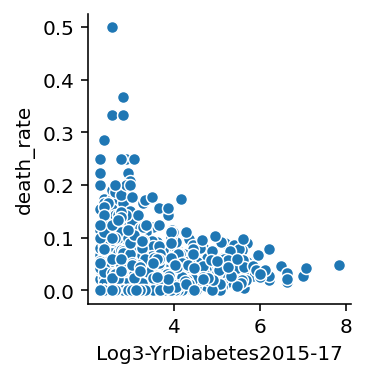

In [56]:
df3.loc[:, 'Log3-YrDiabetes2015-17'] = np.log(df3.loc[:, '3-YrDiabetes2015-17'])
health_risk_columns[0] = 'Log3-YrDiabetes2015-17'
pp = sns.pairplot(data=df3,
                 y_vars = ['death_rate'],
                 x_vars = ['Log3-YrDiabetes2015-17'])

##### Distancing Factors vs. Deaths, Confirmed Cases, and Death Rate

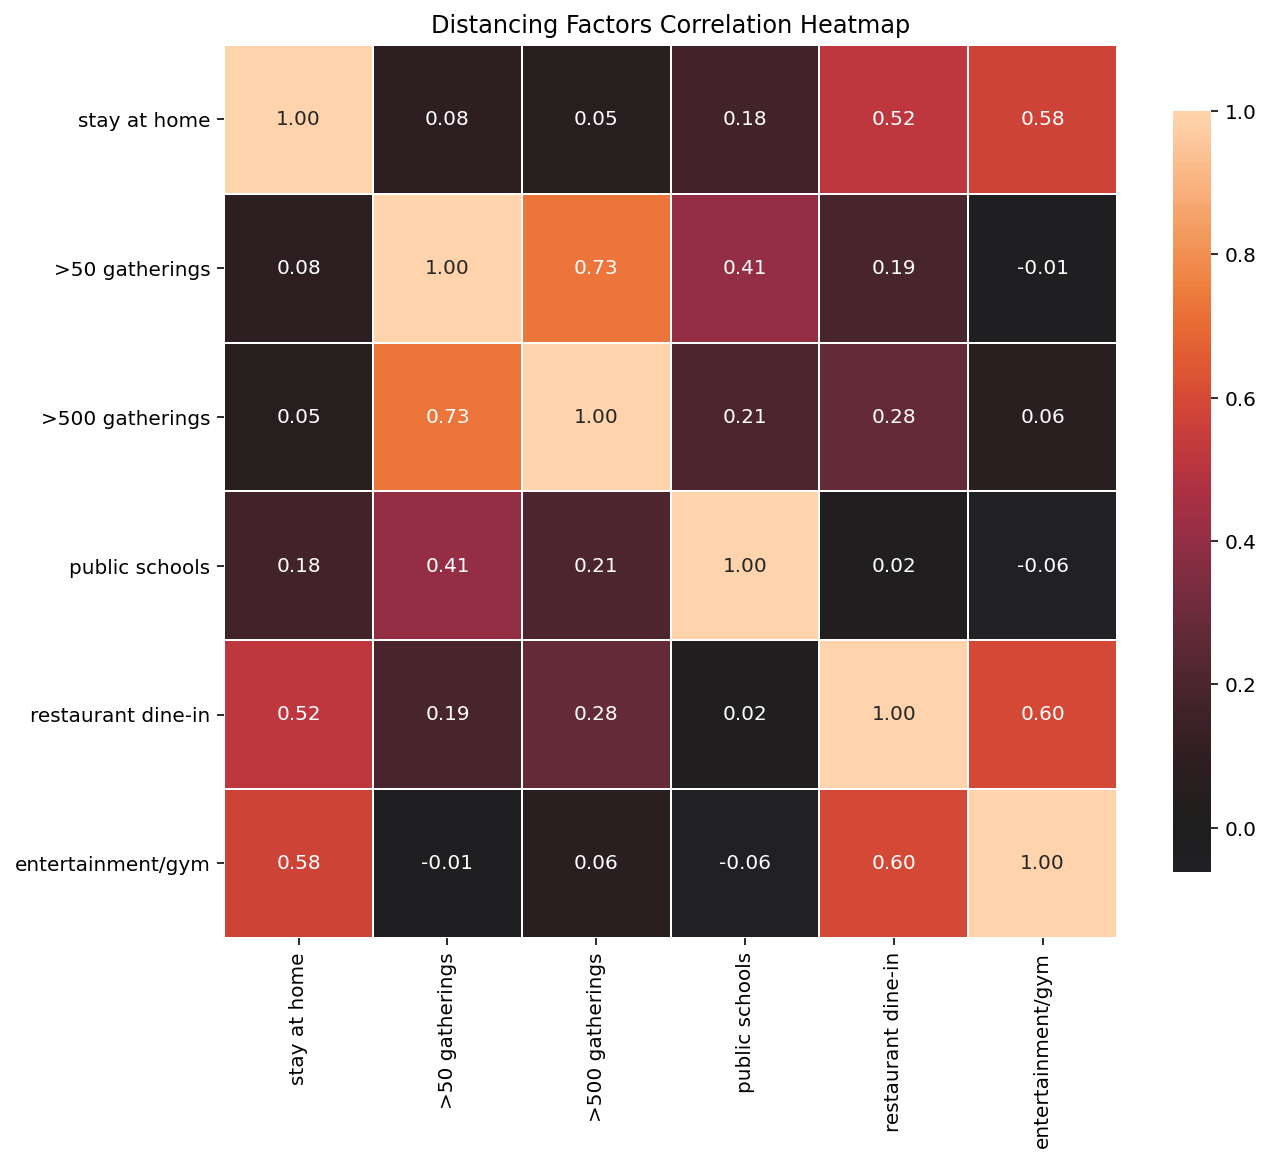

In [57]:
removed_fed_ban_distancing = distancing_factors_columns[:-2]

distancing_factors = df3[removed_fed_ban_distancing]

correlation_heatmap(distancing_factors, 'Distancing Factors')

Restaurant dine-in and entertainment have the highest non-trivial correlation. We also see correlatons between public schools and >50 gatherings and restaurants dine in and >500 gatherings. Finally, we can observe that the stay at home measure also correlates with both restuarant dine in and entertaiment. This correlation plot generally confirms the intuition we have about how activities are restricted based on government social distancing mandates.

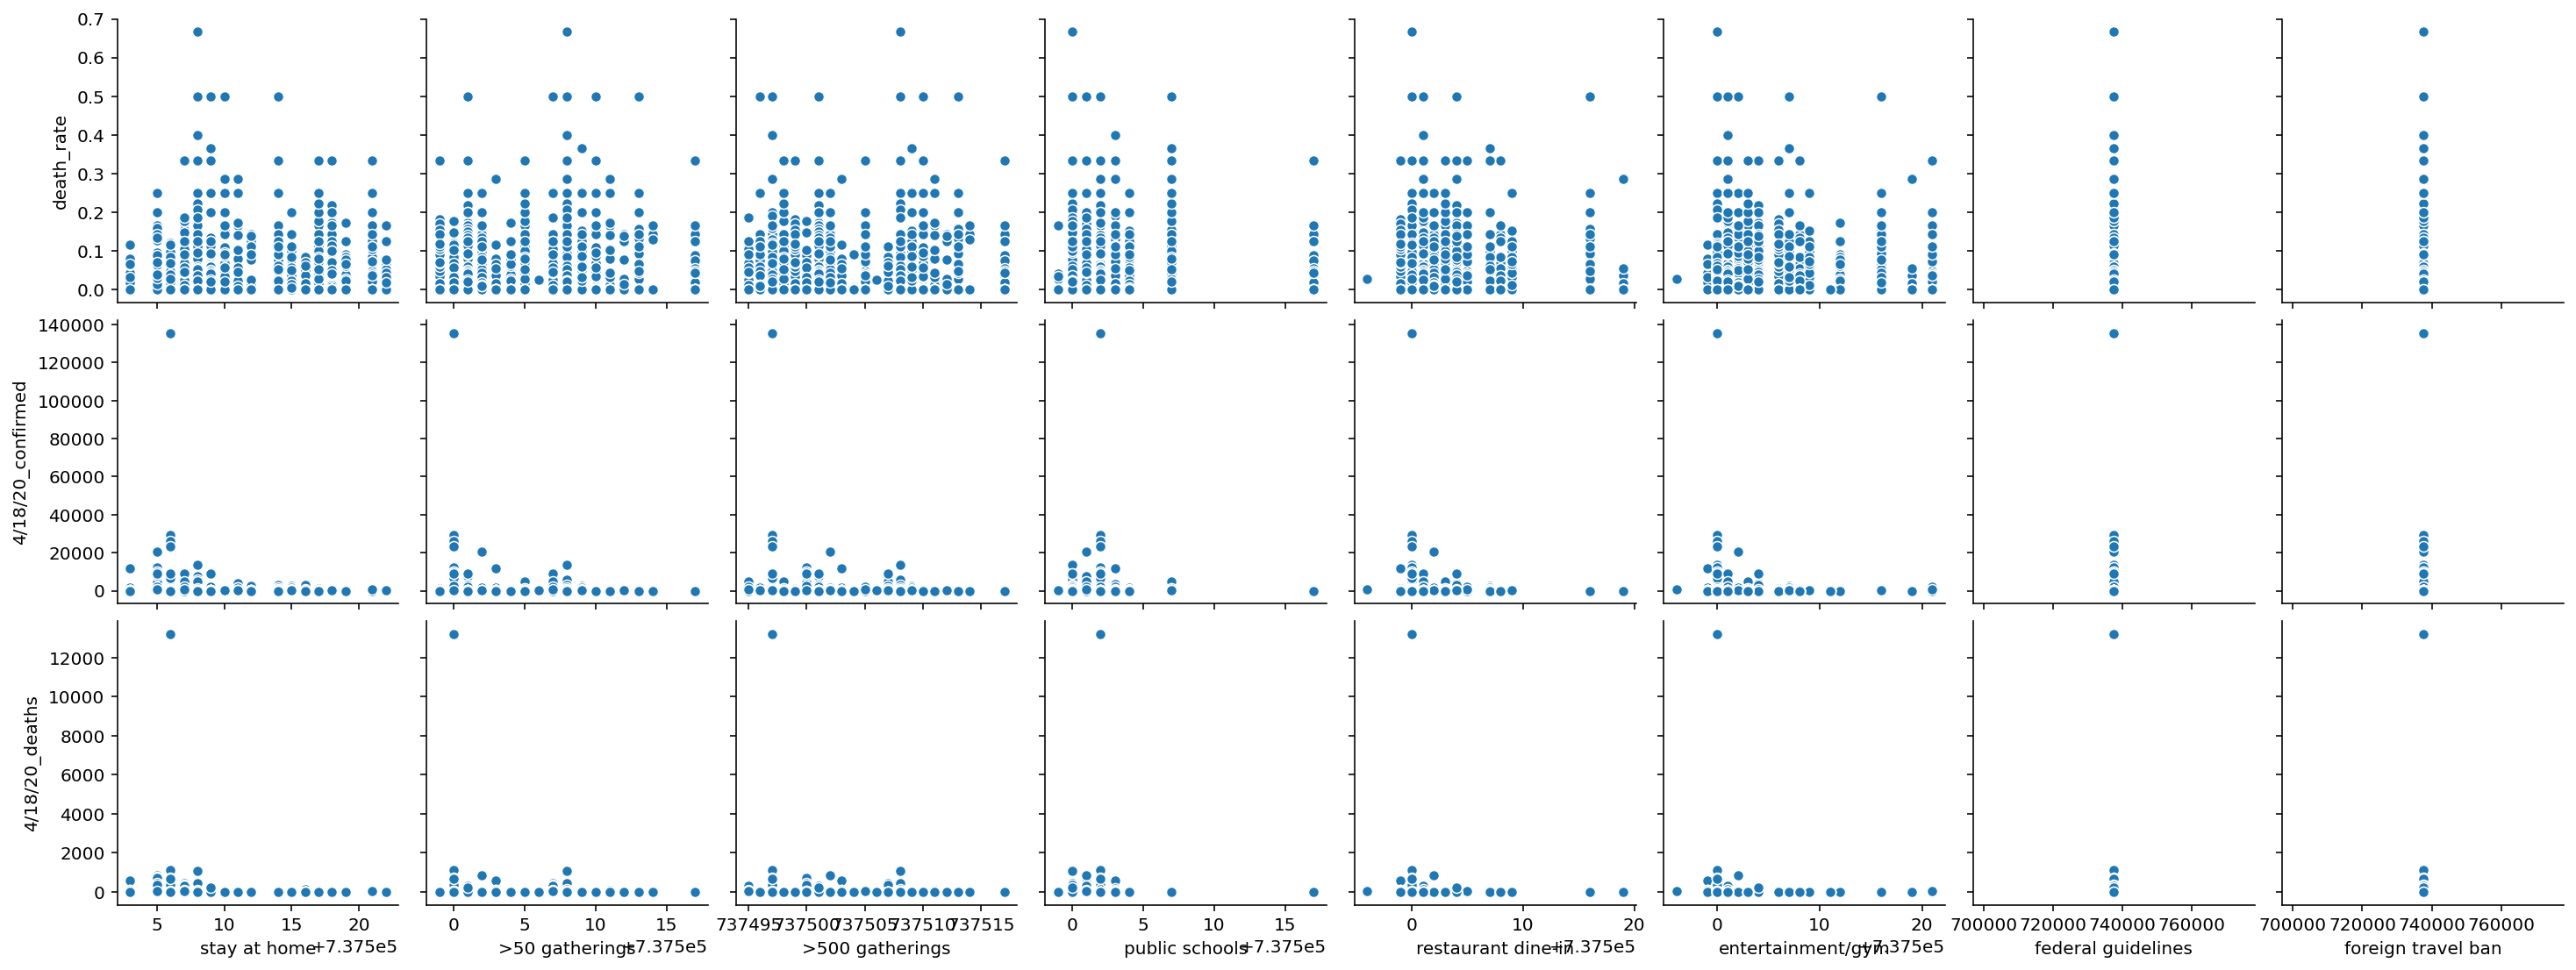

In [58]:
pp = sns.pairplot(data=df3,
                  y_vars=['death_rate', '4/18/20_confirmed', '4/18/20_deaths'],
                  x_vars=distancing_factors_columns)

In [59]:
df3['federal guidelines'].value_counts()
df3['foreign travel ban'].value_counts()
np.delete(distancing_factors_columns, [6, 7])

array(['stay at home', '>50 gatherings', '>500 gatherings',
       'public schools', 'restaurant dine-in', 'entertainment/gym'],
      dtype='<U18')

In [60]:
df3['death_rate'].value_counts()

0.000000    1512
0.100000      22
0.090909      21
0.142857      20
0.166667      19
            ... 
0.001017       1
0.038095       1
0.069264       1
0.018797       1
0.013699       1
Name: death_rate, Length: 605, dtype: int64

- We remove federal guidelines and foreign travel ban as both are uninformative features (only one value each)
- We looked for any apparent relationships between the fields and the number of confirmed cases and deaths, the two fields used in constructing our death rate metric, as well as the metric itself. None of the scatter plots demonstrate discernible patterns or linear relationships between the fields and the death rate. In addition, we realized that there's a large proportion of death rates at 0, which would cause potential issues with our intended linear regression model by biasing the predicted death rate towards 0. As such, we decided to change our response variable to the percentage of confirmed cases, which has a better spread illustrated below.

In [61]:
df3['ConfirmedPercent'] = df3['4/18/20_confirmed'] / df3['PopulationEstimate2018']
df3['ConfirmedPercent'].value_counts()

0.000330    2
0.000297    2
0.000184    2
0.001042    2
0.000298    2
           ..
0.000875    1
0.000283    1
0.000805    1
0.000249    1
0.000489    1
Name: ConfirmedPercent, Length: 2682, dtype: int64

In [62]:
df3['ConfirmedPercent'].mean()

0.001017090817082247

### Confirmed Percent Visualizations

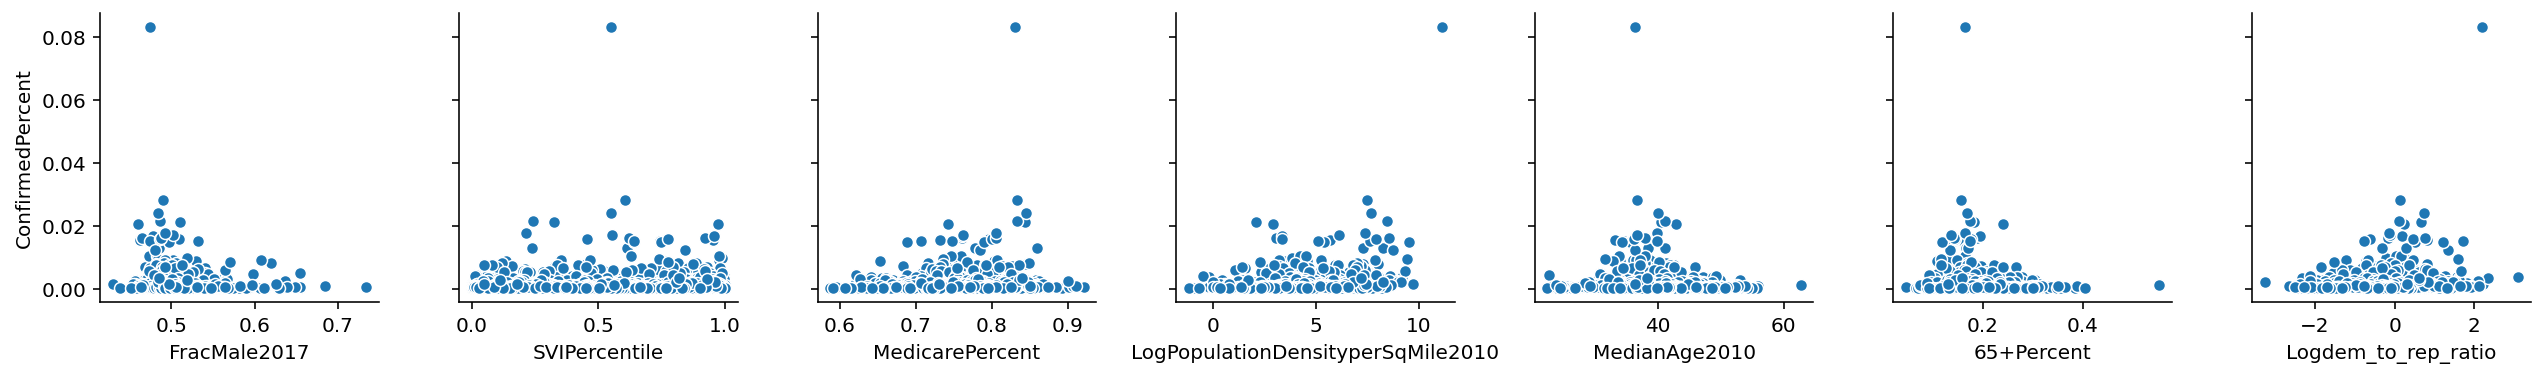

In [63]:
pp = sns.pairplot(data=df3,
                  y_vars=['ConfirmedPercent'],
                  x_vars=demographic_columns)

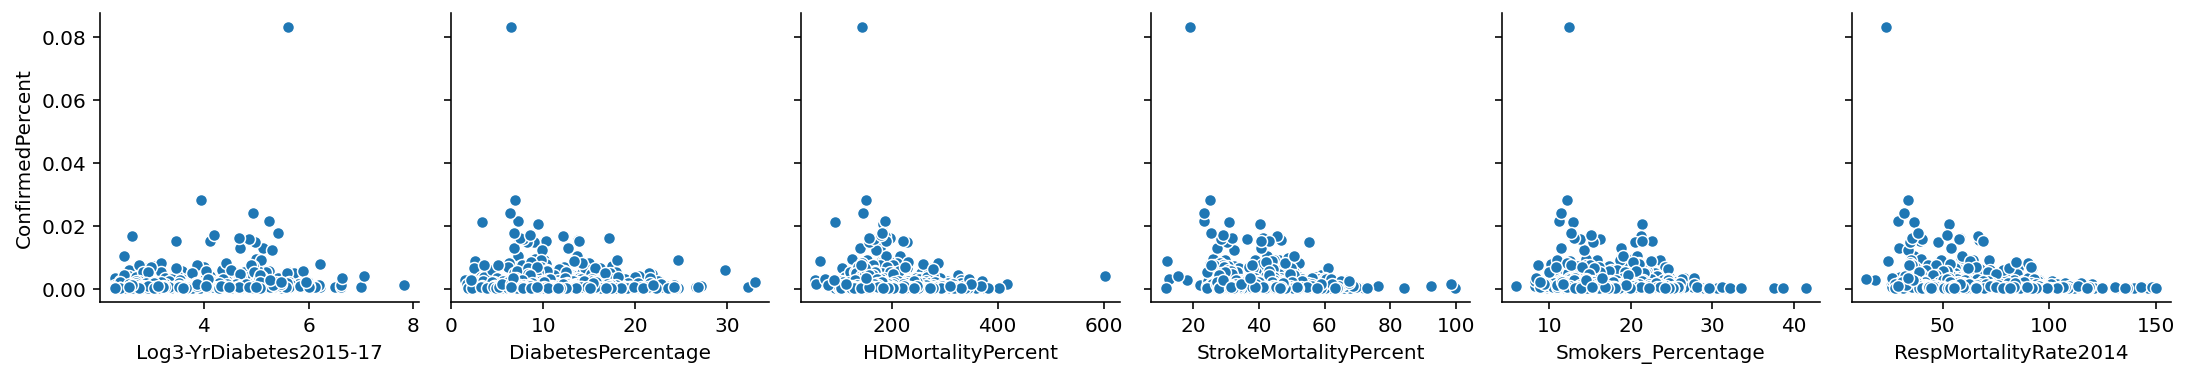

In [64]:
pp = sns.pairplot(data=df3,
                  y_vars=['ConfirmedPercent'],
                  x_vars=health_risk_columns)

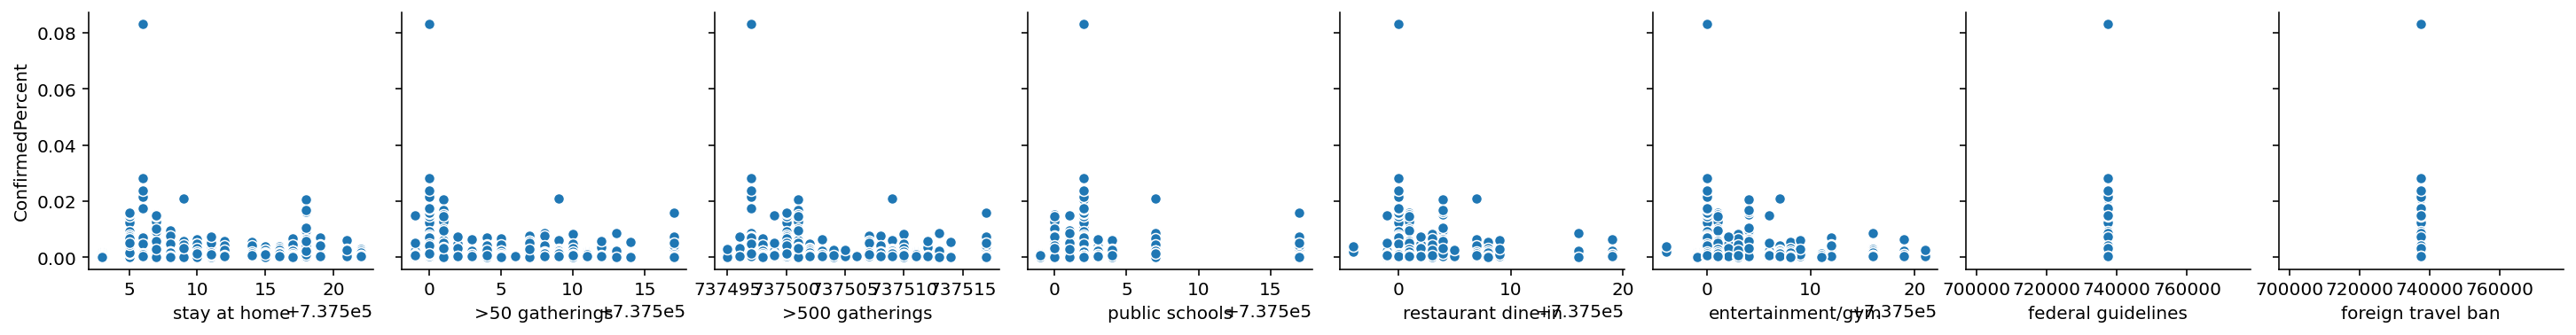

In [65]:
pp = sns.pairplot(data=df3,
                  y_vars=['ConfirmedPercent'],
                  x_vars=distancing_factors_columns)

We tried different transformations (square, cubing, square roots) on our new response variable to see if they would reveal more signficiant relationships with our feature sets, but we did not observe any new insights from these visualizations:

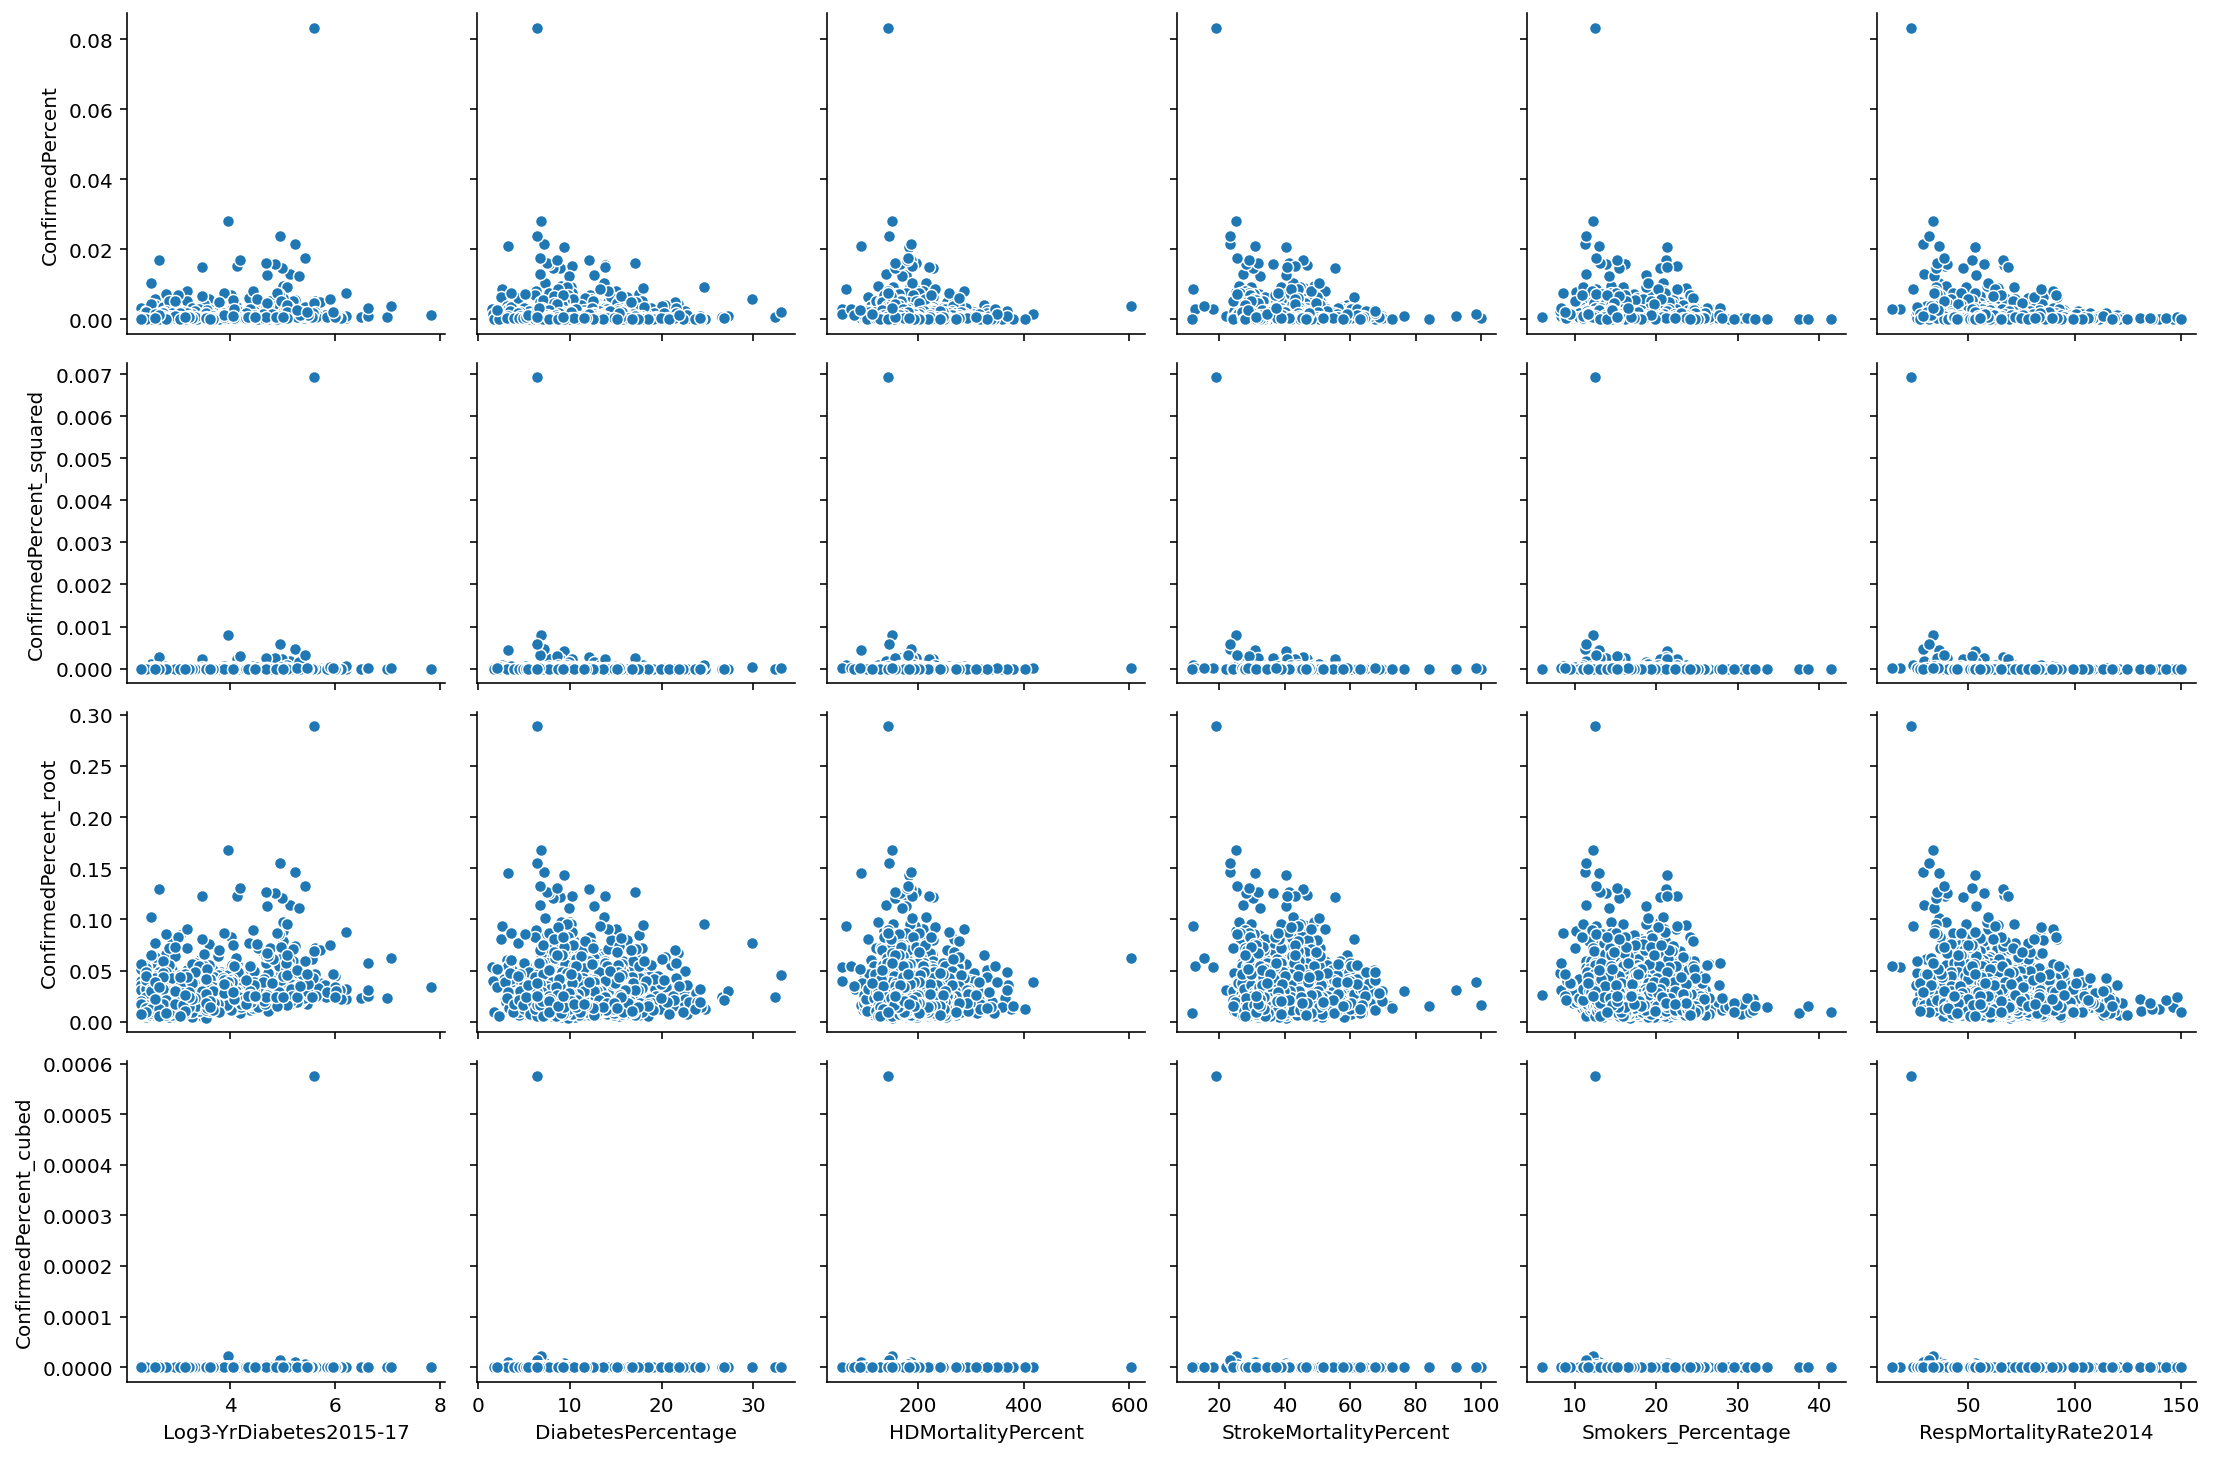

In [66]:
df3['ConfirmedPercent_cubed'] = df3['ConfirmedPercent']**3
df3['ConfirmedPercent_squared'] = df3['ConfirmedPercent']**2
df3['ConfirmedPercent_root'] = np.sqrt(df3['ConfirmedPercent'])

pp = sns.pairplot(data=df3,
                  y_vars=['ConfirmedPercent', 'ConfirmedPercent_squared', 'ConfirmedPercent_root', 'ConfirmedPercent_cubed'],
                  x_vars=health_risk_columns)

In [67]:
df4 = df3[demographic_columns + health_risk_columns + distancing_factors_columns + ['ConfirmedPercent', 'FIPS']].dropna()

In [68]:
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [69]:
confirmed = pd.read_csv('time_series_covid19_confirmed_US.csv')
deaths = pd.read_csv('time_series_covid19_deaths_US.csv')
abridged_counties = pd.read_csv('abridged_couties.csv')

def process_data(counties, confirmed, deaths):

    confirmed_df = confirmed[(confirmed['Admin2'] != 'Dukes and Nantucket') 
                             & (confirmed['Admin2'] != 'Kansas City') 
                             & (confirmed['Admin2'] != 'Michigan Department of Corrections (MDOC)') 
                             & (confirmed["Admin2"] != 'Federal Correctional Institution (FCI)')]
    deaths_df = deaths[(deaths['Admin2'] != 'Dukes and Nantucket') 
                             & (deaths['Admin2'] != 'Kansas City') 
                             & (deaths['Admin2'] != 'Michigan Department of Corrections (MDOC)') 
                             & (deaths["Admin2"] != 'Federal Correctional Institution (FCI)')]

    abridged_counties = counties.rename(columns={"countyFIPS": "FIPS"})
    abridged_counties = abridged_counties.loc[(abridged_counties['FIPS'] != '60020') 
                                            & (abridged_counties['CountyName'] != 'Guam')
                                            & (abridged_counties['FIPS'] != '69120')
                                            & (abridged_counties['FIPS'] != 'City1')
                                            & (abridged_counties['FIPS'] != 'City2')]
    abridged_counties['FIPS'] = abridged_counties['FIPS'].astype(int)

    #Merging datasets and dropping counties with null or no confirmed cases / deaths
    merged = abridged_counties.merge(deaths_df[['FIPS', '4/18/20']], on='FIPS', how='left')
    merged = merged.merge(confirmed_df[['FIPS', '4/18/20']], on='FIPS', how='left', suffixes = ('_deaths', '_confirmed'))
    merged = merged[merged['4/18/20_confirmed'] != 0]
    
    #Creating new features
    merged['death_rate'] = merged['4/18/20_deaths'] / merged['4/18/20_confirmed']
    merged['ConfirmedPercent'] = merged['4/18/20_confirmed'] / merged['PopulationEstimate2018']
    merged['65+Percent'] = merged['PopulationEstimate65+2017'] / merged['PopulationEstimate2018']
    merged['StrokeMortalityPercent'] = merged['StrokeMortality']
    merged['MedicarePercent'] = merged['MedicareEnrollment,AgedTot2017'] / merged['#EligibleforMedicare2018']
    merged['HDMortalityPercent'] = merged['HeartDiseaseMortality'] / merged['PopulationEstimate2018']
    merged['LogPopulationDensityperSqMile2010'] = np.log(merged.loc[:, 'PopulationDensityperSqMile2010'])
    merged['Logdem_to_rep_ratio'] = np.log(merged.loc[:, 'dem_to_rep_ratio'])
    merged['Log3-YrDiabetes2015-17'] = np.log(merged.loc[:, '3-YrDiabetes2015-17'])
    merged = merged.dropna(subset = demographic_columns + health_risk_columns + distancing_factors_columns)

    return merged

data = process_data(abridged_counties, confirmed, deaths)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [70]:
data

,FIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,4/18/20_confirmed,death_rate,ConfirmedPercent,65+Percent,StrokeMortalityPercent,MedicarePercent,HDMortalityPercent,LogPopulationDensityperSqMile2010,Logdem_to_rep_ratio,Log3-YrDiabetes2015-17
0,1001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,25.0,0.080000,0.000450,0.150933,56.1,0.703383,0.003678,4.519612,-1.118846,2.772589
1,1003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,109.0,0.018349,0.000500,0.194535,41.9,0.768123,0.000840,4.742320,-1.373358,3.496508
6,1013,1.0,13.0,Butler,AL,Alabama,31.757139,-86.684347,31.773539,-86.653550,...,13.0,0.000000,0.000661,0.197002,59.0,0.703923,0.013186,3.295837,-0.274104,2.639057
7,1015,1.0,15.0,Calhoun,AL,Alabama,33.776245,-85.829561,33.725460,-85.819442,...,66.0,0.030303,0.000578,0.173806,44.0,0.707059,0.002763,5.276583,-0.909015,2.890372
8,1017,1.0,17.0,Chambers,AL,Alabama,32.916331,-85.394853,32.860439,-85.266474,...,240.0,0.045833,0.007140,0.191343,45.2,0.683700,0.005852,4.050044,-0.304526,3.044522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,55141,55.0,141.0,Wood,WI,Wisconsin,44.456287,-90.033120,44.478782,-89.963901,...,2.0,0.000000,0.000027,0.201396,34.0,0.806739,0.001700,4.546481,-0.412700,3.044522
3125,56013,56.0,13.0,Fremont,WY,Wyoming,43.037264,-108.624730,43.013591,-108.608913,...,47.0,0.000000,0.001189,0.178341,32.1,0.804820,0.004391,1.481605,-0.977878,2.639057
3129,56021,56.0,21.0,Laramie,WY,Wyoming,41.311244,-104.693106,41.153225,-104.773209,...,70.0,0.000000,0.000707,0.154674,31.9,0.775934,0.001608,3.532226,-0.764062,3.135494
3131,56025,56.0,25.0,Natrona,WY,Wyoming,42.967181,-106.786570,42.844218,-106.336877,...,38.0,0.000000,0.000480,0.147621,32.4,0.771217,0.002123,2.646175,-1.275632,2.564949


##### Train Test Split & Normalizing Quantitative Variables for Regularization

In [71]:
X_train, X_test, y_train, y_test = train_test_split(data[demographic_columns + health_risk_columns + distancing_factors_columns], 
                                                    data['ConfirmedPercent'],
                                                    test_size=0.15,
                                                    random_state=8)
scaler = StandardScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_normalized = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

##### Using Cross Validation for Feature Selection & Hyperparameter Tuning (Models with all / Individual Feature Categories)

In [0]:
# Reasoning behind choosing OLS/Ridge/LASSO

In [0]:
print("Training MSE")
linear_model_all = lm.LinearRegression(fit_intercept=True)
linear_model_all.fit(X_train_normalized, y_train)
print("All: " + str(mean_squared_error(linear_model_all.predict(X_train_normalized), y_train)))

linear_model_demographic = lm.LinearRegression(fit_intercept=True)
linear_model_demographic.fit(X_train_normalized[demographic_columns], y_train)
print("Demographic: " + str(mean_squared_error(linear_model_demographic.predict(X_train_normalized[demographic_columns]), y_train)))

linear_model_distancing = lm.LinearRegression(fit_intercept=True)
linear_model_distancing.fit(X_train_normalized[distancing_factors_columns], y_train)
print("Social: " + str(mean_squared_error(linear_model_distancing.predict(X_train_normalized[distancing_factors_columns]), y_train)))

linear_model_health = lm.LinearRegression(fit_intercept=True)
linear_model_health.fit(X_train_normalized[health_risk_columns], y_train)
print("Health: " + str(mean_squared_error(linear_model_health.predict(X_train_normalized[health_risk_columns]), y_train)))

print("Test Set MSE")
print("All: " + str(mean_squared_error(linear_model_all.predict(X_test_normalized), y_test)))
print("Demographic: " + str(mean_squared_error(linear_model_demographic.predict(X_test_normalized[demographic_columns]), y_test)))
print("Social: " + str(mean_squared_error(linear_model_distancing.predict(X_test_normalized[distancing_factors_columns]), y_test)))
print("Health: " + str(mean_squared_error(linear_model_health.predict(X_test_normalized[health_risk_columns]), y_test)))

In [0]:
train_mse = [9.172526653956524, 9.882733099365347, 1.101631447810902, 1.0338110713923675]
test_mse = [1.8352820962834592, 1.3750571516172487, 1.2203242901872042, 1.3771402135345968]
index_mse = ['Global', 'Demographic', 'Social Distance', 'Health']

mse = pd.DataFrame({'test': test_mse,
                   'train': train_mse}, index=index_mse)
ax = mse.plot.bar(rot=0)
ax.set_ylabel('Mean Squared Error (e-06)')
ax.set_title('Training and Test Set MSE')

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler

In [0]:
def rmse_score(model, X, y):
    return np.sqrt(np.mean((y - model.predict(X)) ** 2))

alpha_arr = np.linspace(0.01, 0.5, 100)
alpha = alpha_arr[0]
cv_errors = []
model = Pipeline([
                  ('LinearModel', Lasso(alpha, max_iter=1000000))
                  ])

for alpha in alpha_arr:
    model.set_params(LinearModel__alpha=alpha)
    cv_error = np.abs(np.mean(cross_val_score(model, X_train_normalized, y_train, scoring=rmse_score, cv=5)))
    
    cv_errors.append(cv_error)
    
best_alpha_lasso = alpha_arr[cv_errors.index(min(cv_errors))]

plt.plot(alpha_arr, cv_errors)
plt.title('Lasso Regularization: Cross validation error over alpha')
plt.xlabel('Alpha')
plt.ylabel('Cross validation error')
#plt.ylim(0.00298, 0.00300)
plt.show()

print(f"The best alpha value is {best_alpha_lasso}")
print(f"Cross validation error for the best alpha value is {cv_errors[np.argmin(cv_errors)]}")

In [0]:
alpha_arr = np.linspace(0.01, 0.5, 100)
cv_errors = []
alpha = 0.01

model = Pipeline([('LinearModel', Ridge(alpha))])

for alpha in alpha_arr:
    model.set_params(LinearModel__alpha=alpha)
    # compute the cross validation error
    cv_error = np.abs(np.mean(cross_val_score(model, X_train_normalized, y_train, scoring=rmse_score, cv=5)))
    cv_errors.append(cv_error)

best_alpha_ridge = alpha_arr[cv_errors.index(min(cv_errors))]

print(f"The best alpha value is {best_alpha_ridge}")
print(f"Cross validation error for the best alpha value is {cv_errors[np.argmin(cv_errors)]}")

plt.plot(alpha_arr, cv_errors)
plt.title('Ridge Regularization: Cross validation error over alpha')
plt.xlabel('Alpha')
plt.ylabel('Cross validation error')
plt.show()

In [0]:
residuals = y_test - linear_model_all.predict(X_test_normalized)
ax = sns.regplot(linear_model_all.predict(X_test_normalized), residuals)
ax.set_xlabel('')
ax.set_ylabel('Residuals')
ax.set_title("Residuals vs. Confirmed Percent (Full Model)");

In [0]:
best_lasso_model = Lasso(alpha = best_alpha_lasso)
best_lasso_model.fit(X_train_normalized, y_train)
best_lasso_model.coef_

In [0]:
best_ridge_model = Lasso(alpha = best_alpha_ridge)
best_ridge_model.fit(X_train_normalized, y_train)
best_ridge_model.coef_

In [0]:
best_alpha_ridge

In [0]:
print("Test Set MSE")
print("All: " + str(mean_squared_error(linear_model_all.predict(X_test_normalized), y_test)))
print("Demographic: " + str(mean_squared_error(linear_model_demographic.predict(X_test_normalized[demographic_columns]), y_test)))
print("Social: " + str(mean_squared_error(linear_model_distancing.predict(X_test_normalized[distancing_factors_columns]), y_test)))
print("Health: " + str(mean_squared_error(linear_model_health.predict(X_test_normalized[health_risk_columns]), y_test)))
print("Lasso " + str(mean_squared_error(best_lasso_model.predict(X_test_normalized), y_test)))
print("Ridge: " + str(mean_squared_error(best_ridge_model.predict(X_test_normalized), y_test)))


We experimented with using different combinations of features from the three buckets and found that test and train set MSE were minimized for the following subset of features: 'Log3-YrDiabetes2015-17', 'HDMortalityPercent', 'Smokers_Percentage', 'MedianAge2010', '65+Percent'

In [0]:
print("Train Set MSE")
feature_mix = ['Log3-YrDiabetes2015-17', 'HDMortalityPercent','Smokers_Percentage', 'MedianAge2010', '65+Percent']
linear_model_mixed = lm.LinearRegression(fit_intercept=True)
linear_model_mixed.fit(X_train_normalized[feature_mix], y_train)
print("Mixed: " + str(mean_squared_error(linear_model_mixed.predict(X_train_normalized[feature_mix]), y_train)))

print("Test Set MSE")
print("Mixed: " + str(mean_squared_error(linear_model_mixed.predict(X_test_normalized[feature_mix]), y_test)))

We can observe the MSE levels for the mixed model relative to the previous four models:

In [0]:
train_mse = [9.172526653956524, 9.882733099365347, 1.101631447810902, 1.0338110713923675, 1.0736329853024072]
test_mse = [1.8352820962834592, 1.3750571516172487, 1.2203242901872042, 1.3771402135345968, 1.0003286596657148]
index_mse = ['Global', 'Demographic', 'Social Distance', 'Health', 'Mixed']

mse = pd.DataFrame({'test': test_mse,
                   'train': train_mse}, index=index_mse)
ax = mse.plot.bar(rot=0)
ax.set_ylabel('Mean Squared Error (e-06)')
ax.set_title('Training and Test Set MSE')